# ML 3: NumPy and Pandas

In [ ]:
import numpy as np #library for work with arrays
import pandas as pd #library for work with tables
import matplotlib.pyplot as plt #library for visualization
#import sys
#import sklearn

In [ ]:
#sklearn.__version__

'1.20.3'

## Numpy
Useful information: https://realpython.com/numpy-tutorial/

In [ ]:
np.__version__

In [ ]:
a = [1, 2, 3]
a = np.array(a)
a #type(a[0])

array([1, 2, 3])

In [ ]:
b = a #.copy()
a[1] = 5
print(a)
print(b)

[1 5 3]
[1 5 3]


### Shape

In [ ]:
a.shape

(3,)

In [ ]:
np.array([a]).shape

(1, 3)

In [ ]:
b = a.reshape(1,-1)
#(a.reshape(-1,1)).shape
b.shape

(1, 3)

In [ ]:
a.T
#b.T

array([1, 5, 3])

In [ ]:
c = np.random.rand(4,3)
c

array([[0.10001046, 0.80995108, 0.79193128],
       [0.18339918, 0.21616259, 0.82028639],
       [0.81444952, 0.36405017, 0.84919516],
       [0.04142426, 0.41712097, 0.28234271]])

In [ ]:
c.reshape(1,-1)

array([[0.10001046, 0.80995108, 0.79193128, 0.18339918, 0.21616259,
        0.82028639, 0.81444952, 0.36405017, 0.84919516, 0.04142426,
        0.41712097, 0.28234271]])

In [ ]:
c.max(axis=1)

array([0.80995108, 0.82028639, 0.84919516, 0.41712097])

### Broadcasting

In [ ]:
c+c.max(axis=0)
#c+c.max(axis=1).reshape(-1,1)

array([[0.91445998, 1.61990215, 1.64112645],
       [0.9978487 , 1.02611367, 1.66948155],
       [1.62889904, 1.17400125, 1.69839032],
       [0.85587378, 1.22707204, 1.13153787]])

### Matrix Multiplication

In [ ]:
c*c
#c.dot(c.T)
#np.matmul(c.T,c)

array([[0.01000209, 0.65602074, 0.62715516],
       [0.03363526, 0.04672627, 0.67286976],
       [0.66332802, 0.13253253, 0.72113242],
       [0.00171597, 0.1739899 , 0.07971741]])

### Change type

In [ ]:
c.dtype
#c.astype(np.float32)

dtype('float64')

### Problem 1.
Assume that in rows of matrix $A = \begin{pmatrix} x^{(1)}_1 & x^{(1)}_2 & x^{(1)}_3 \\ x^{(2)}_1 & x^{(2)}_2 & x^{(2)}_3\\ \cdots & \cdots & \cdots\\ x^{(20)}_1 & x^{(20)}_2 & x^{(20)}_3 \end{pmatrix}$ we have coordinates of 20 points and in rows of matrix $B = \begin{pmatrix} y^{(1)}_1 & y^{(1)}_2 & y^{(1)}_3 \\ y^{(2)}_1 & y^{(2)}_2 & y^{(2)}_3\\ \cdots & \cdots & \cdots\\ y^{(5)}_1 & y^{(5)}_2 & y^{(5)}_3 \end{pmatrix}$ we have coordinates of 5 other points. Using boadcasting, get a matrix with Eucledean distances from every point $y^{(i)}$ to every point $x^{(j)}:$
$$
D =  \begin{pmatrix} d(y^{(1)}, x^{(1)}) & d(y^{(1)}, x^{(2)}) & \ldots & d(y^{(1)}, x^{(20)}) \\ d(y^{(2)}, x^{(1)}) & d(y^{(2)}, x^{(2)}) & \ldots & d(y^{(2)}, x^{(20)})\\ \cdots & \cdots & \cdots & \cdots\\ d(y^{(5)}, x^{(1)}) & d(y^{(5)}, x^{(2)}) & \ldots & d(y^{(5)}, x^{(20)}) \end{pmatrix}
$$

In [ ]:
A = np.random.randn(20,3)
B = np.random.randn(5,3)

(20, 5)

### Problem 2.
A unit ball centered in the origin (neighborhood of the origing of raduis 1) in $\ell_1$ metric is defined as
$$
\{(x,y)\in\mathbb{R}^2:|x-0|+|y-0|=|x|+|y|<1\}.
$$
To plot the boundary of this ball you can plot the surface $z=|x|+|y|$ and then take its section at the level $z=1$, you'll get the level curve
$$
|x|+|y|=1.
$$
The unit ball in $\ell_2$ metric is plotted below, plot a unit ball in $\ell_1$ metric (you can modify the existing code).

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def f(x, y):
    return np.sqrt(x**2 + y**2)

In [ ]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

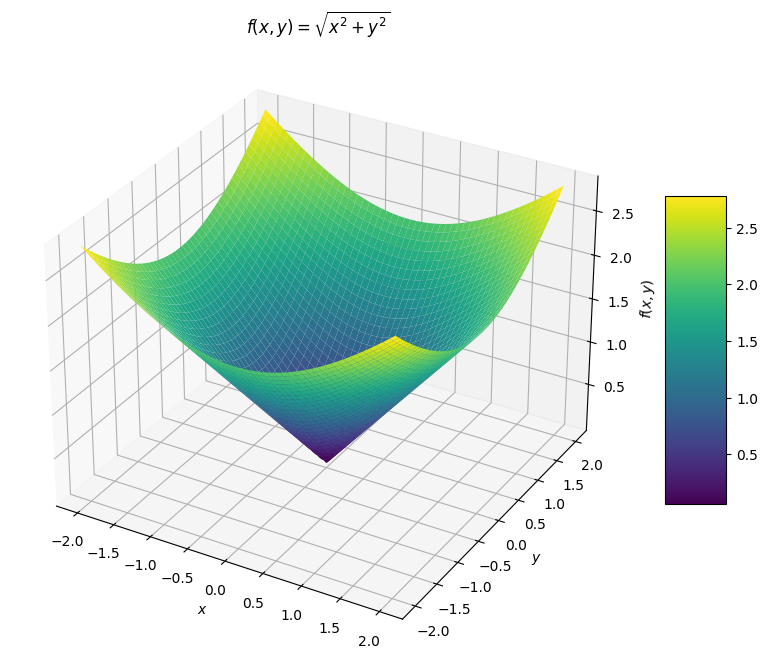

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Add labels
ax.set_title('$f(x,y) = \sqrt{x^2 + y^2}$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

# Show the plot
plt.show()

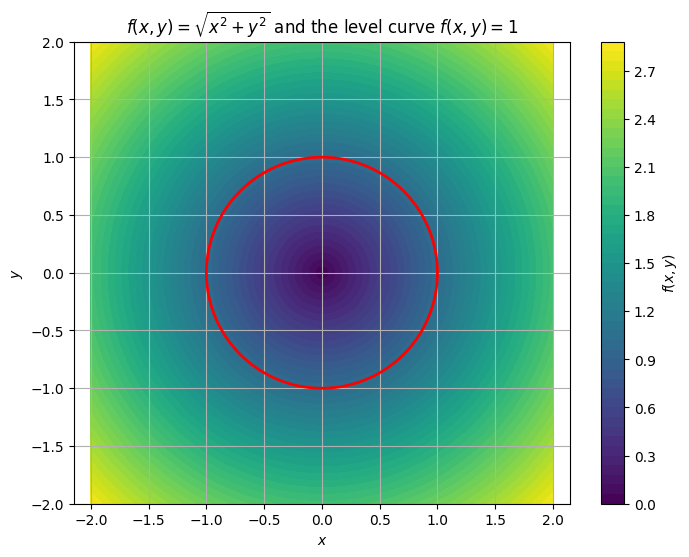

In [ ]:
plt.figure(figsize=(8, 6))

# Plot the function as a filled contour plot
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='$f(x,y)$')

# Plot the level curve f(x,y) = 1
plt.contour(X, Y, Z, levels=[1], colors='red', linewidths=2)

# Add labels and title
plt.title('$f(x,y) = \sqrt{x^2 + y^2}$ and the level curve $f(x,y) = 1$')
plt.xlabel('$x$')
plt.ylabel('$y$')

# Show the plot
plt.grid(True)
plt.axis('equal')
plt.show()

## Pandas
### Download data
* .csv (Comma Separated Files) [pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
* .xls (eXceL Spreadsheet) [pandas.read_excel()](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)
* .json (JavaScript Object Notation) [pandas.read_json()](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)
* .txt

Save .csv file from https://www.randomservices.org/random/data/Galton.html

Another source: https://raw.githubusercontent.com/data-8/materials-fa17/master/lec/galton.csv

F. Galton introduced the term _regression._ In the figure below you can see that "extremely tall parents tend to have children who are taller than average and extremely small parents tend to have children who are smaller than average, but in both cases the children tend to be closer to the average than were their parents". (Stephen Senn _Francis Galton and regression to the mean._ Significance, Vol. 8, Iss. 3)

![title](https://upload.wikimedia.org/wikipedia/commons/b/b2/Galton%27s_correlation_diagram_1875.jpg)
**Francis Galton.** *Regression towards mediocrity in hereditary stature.* The Journal of the Anthropological Institute of Great Britain and Ireland. 15: 246–263 (1886)

In [ ]:
#To see the current directory, you can type
!pwd

/content


In [ ]:
!ls

sample_data


In [ ]:
#PATH = 'Galtons Height Data.csv'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anton-selitskiy/The-Art-of-ML/main/Galtons%20Height%20Data.csv')

In [ ]:
df.head() #df.tail(6)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    int64  
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 42.2+ KB


In [ ]:
df.describe()

,Family,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000,898.000000
mean,105.216036,69.232851,64.084410,66.760690,6.135857
std,57.189899,2.470256,2.307025,3.582918,2.685156
min,1.000000,62.000000,58.000000,56.000000,1.000000
25%,58.000000,68.000000,63.000000,64.000000,4.000000
50%,105.000000,69.000000,64.000000,66.500000,6.000000
75%,155.750000,71.000000,65.500000,69.700000,8.000000
max,205.000000,78.500000,70.500000,79.000000,15.000000


### Dictionary and creation of dataframes

In [ ]:
d = {'c1': [0, 1], 'c2':[3, 4]}

In [ ]:
d['c1']

[0, 1]

In [ ]:
df1 = pd.DataFrame(data = d)
df1.head()

,c1,c2
0,0,3
1,1,4


### Access to Columns

In [ ]:
df.columns #.values

Index(['Family', 'Father', 'Mother', 'Gender', 'Height', 'Kids'], dtype='object')

In [ ]:
for i in df.columns:
    print(i)

Family
Father
Mother
Gender
Height
Kids


In [ ]:
df.columns[0]

'Family'

In [ ]:
d = dict(zip(df.columns.values[[0,1,2,4,5]], [np.int32, np.float32, np.float32, np.float32, np.int32]))

In [ ]:
#df2 = pd.read_csv(PATH, dtype=d)
#df2.info()

### Access to Rows

In [ ]:
df.index

RangeIndex(start=0, stop=898, step=1)

### Access by index

In [ ]:
df.iloc[df.index % 2 == 0].head(5)
#df.iloc[1,2]

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
2,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
6,2,75.5,66.5,F,65.5,4
8,3,75.0,64.0,M,71.0,2


In [ ]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [ ]:
#df.columns = ['Family', 'Father', 'Mother', 'AverageHeight', 'Kids', 'Num', 'Gender', 'Height']
#df.Gender = df.Gender.map({'male': 'M', 'female': 'F'})

### Visualization

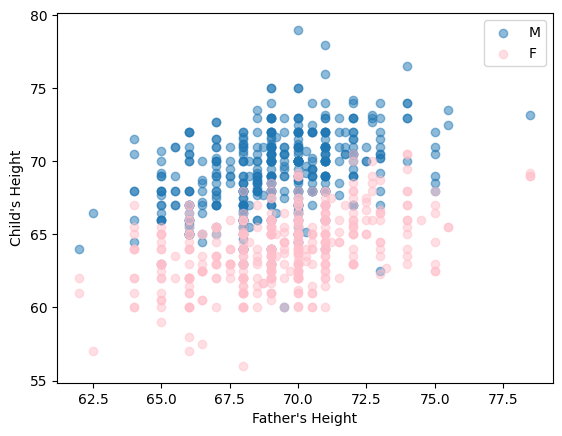

In [ ]:
plt.scatter(df[df['Gender']=='M'].Father, df[df['Gender']=='M'].Height, label="M", alpha=0.5)
plt.scatter(df[df['Gender']=='F'].Father, df[df['Gender']=='F'].Height, label="F", alpha=0.5, c='pink')
plt.xlabel("Father's Height")
plt.ylabel("Child's Height")
plt.legend()
plt.show()

### Working with columns

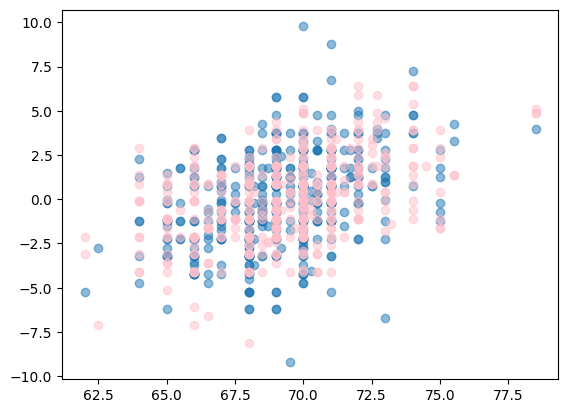

In [ ]:
plt.scatter(df[df['Gender']=='M'].Father, df[df['Gender']=='M'].Height-df[df['Gender']=='M'].Height.mean(), alpha=0.5)
plt.scatter(df[df['Gender']=='F'].Father, df[df['Gender']=='F'].Height-df[df['Gender']=='F'].Height.mean(), alpha=0.5, c='pink')

### Delete columns

In [ ]:
df.drop("Height", axis=1).head()  #inplace=True

,Family,Father,Mother,Gender,Kids
0,1,78.5,67.0,M,4
1,1,78.5,67.0,F,4
2,1,78.5,67.0,F,4
3,1,78.5,67.0,F,4
4,2,75.5,66.5,M,4


### View elements

In [ ]:
set(df["Gender"])
#df.Gender.unique()

{'F', 'M'}

### Change values

In [ ]:
df["Sex"] = df.Gender.map({"M":0, "F":1})
print(df.Sex.dtype)
df.head()

int64


,Family,Father,Mother,Gender,Height,Kids,Sex
0,1,78.5,67.0,M,73.2,4,0
1,1,78.5,67.0,F,69.2,4,1
2,1,78.5,67.0,F,69.0,4,1
3,1,78.5,67.0,F,69.0,4,1
4,2,75.5,66.5,M,73.5,4,0


In [ ]:
#df["NewAge"] = df["Age"].apply(lambda x: x+100)

In [ ]:
df.groupby("Gender")["Height"].mean()

Gender
F    64.110162
M    69.228817
Name: Height, dtype: float64

In [ ]:
df.groupby("Family")["Height"].count().head()

Family
1    4
2    4
3    2
4    5
5    6
Name: Height, dtype: int64

In [ ]:

(df.groupby("Family")["Height"].mean() > 70).sum()

19

In [ ]:
df[(df.Height > 70) & (df.Gender=="M")].head()

,Family,Father,Mother,Gender,Height,Kids,Sex
0,1,78.5,67.0,M,73.2,4,0
4,2,75.5,66.5,M,73.5,4,0
5,2,75.5,66.5,M,72.5,4,0
8,3,75.0,64.0,M,71.0,2,0
10,4,75.0,64.0,M,70.5,5,0


## Problems
3. What is the fraction of families with 3 or more children?

In [ ]:
#Your code


4. Create a new column with the avarage height of the parents

In [ ]:
#Your code


In [ ]:
df.head()

,Family,Father,Mother,Gender,Height,Kids,Sex,Average Hight
0,1,78.5,67.0,M,73.2,4,0,72.75
1,1,78.5,67.0,F,69.2,4,1,72.75
2,1,78.5,67.0,F,69.0,4,1,72.75
3,1,78.5,67.0,F,69.0,4,1,72.75
4,2,75.5,66.5,M,73.5,4,0,71.00


5* (not graded). Plot a scatterplots of male vs the avarage parents' height and females $\times 1.08$ (the guess by Galton) _"which is equivalent to adding a little less than one-twelfthto each female height. It differs a very little from the factors employed by other anthropologists, who, moreover, differ a trifle between themselves; anyhow,  itsuits my data better than 1.07 or 1.09. The final result is not of a kind to be affected by these minute details, for it happened that, owing to a mistaken direction,the computer to whom I first entrusted the figures used a somewhat different factor, yet the result came out closely the same."_ http://www.stat.ucla.edu/~nchristo/statistics100C/history_regression.pdf

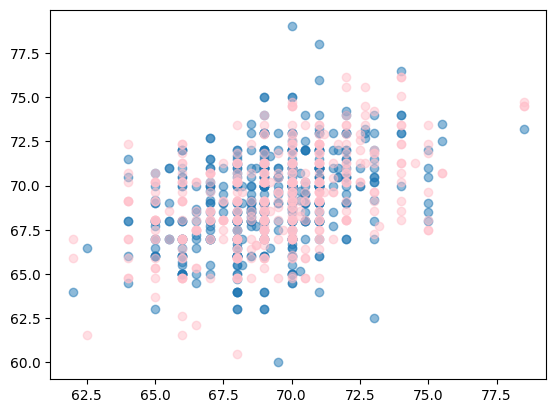

In [ ]:
#Your code
#plt.scatter(df[df['Gender']=='M'].Father, df[df['Gender']=='M'].Height, alpha=0.5)
#plt.scatter(df[df['Gender']=='F'].Father, df[df['Gender']=='F'].Height*1.08, alpha=0.5, c='pink')

It's a genius guess by Galton allowed him to use more data for analysis